# Beginning

Q-Q plot to chek if the dataset is normally distributed, so I check for normality

In [1]:
import pandas as pd
import calendar
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import scipy.stats as stats

import dataframe_image as dfi


print('Libraries have been imported !')

Libraries have been imported !


In [2]:
# to use the URL
file = 'https://federaciondecafeteros.org/app/uploads/2020/01/Precios-%C3%A1rea-y-producci%C3%B3n-de-caf%C3%A9.xlsx'

# to use the local file
#file = pd.ExcelFile('Precios-área-y-producción-de-café.xlsx')

# name of the sheet '6. Precio OIC Mensual'
df = pd.read_excel(file, sheet_name = '6. Precio OIC Mensual')

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,Precios indicativos OIC por grupos - Promedio ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Centavos de dólar por libra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Fuente: ICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Suaves colombianos (arábigo),NaN,NaN,Otros suaves (arábigo),NaN,NaN,Naturales del Brasil (arábigo),NaN,NaN,Robustas,NaN,NaN,NaN


In [3]:
# removes the first column as it doesn't have any data
df = df.drop(df.columns[[0,-1]], axis = 1)

# remove the first 5 columns as is part of the format in the excel file
df = df.drop(index = df.index[0:6],
       axis = 0)

# because the first 5 rows where deleted, I need to reset the index to be 0 and not to start at row # 6
df = df.reset_index(drop=True)

In [4]:
# renames the column for an easier comprenhesion 
df = df.rename(columns = {'Unnamed: 1': 'Date', 'Unnamed: 2':'OIC_price',
                          'Unnamed: 3':'Colombia_ny', 'Unnamed: 4':'Colombia_europe', 'Unnamed: 5':'Colombia_average',
                          'Unnamed: 6':'Other_ny', 'Unnamed: 7':'Other_europe','Unnamed: 8':'Other_average',
                          'Unnamed: 9':'Brazil_ny', 'Unnamed: 10':'Brazil_europe', 'Unnamed: 11':'Brazil_average',
                          'Unnamed: 12':'Robustas_ny', 'Unnamed: 13':'Robustas_europe','Unnamed: 14':'Robustas_average'})
df.head()

,Date,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
0,2000-01-01 00:00:00,82.15,130.12,124.36,130.13,109.17,116.82,111.11,97.67,103.1,97.68,53.62,52.41,53.18
1,2000-02-01 00:00:00,76.15,124.72,118.67,124.73,101.17,110.19,103.44,91.51,96.58,91.51,49.41,47.97,48.85
2,2000-03-01 00:00:00,73.49,119.51,115.78,119.51,98.26,108.13,100.73,89.93,94.78,89.93,47.26,44.73,46.25
3,2000-04-01 00:00:00,69.53,112.67,109.12,112.67,92.41,101.51,94.61,86.46,90.7,86.46,45.21,43.31,44.45
4,2000-05-01 00:00:00,69.22,110.31,107.85,110.31,91.76,100.99,94.17,87.23,91.01,87.23,45.19,43.01,44.32


### Chequing for Normality

Create a copy of the dataframe to work with, remove the date column, then will check the variables for Normality, as is one of the conditions to do a linear regression

In [5]:
# creates a copy of the original dataframe
test = df.copy()

# saves the column 'Date' as date  and removes the column 'Date' from the new dataframe 'test'
date = test['Date']
test = test.drop(['Date'], axis = 1)

test = test.astype(float) # converts everything to float

### Split the data frame intro X and y

In [6]:
import statsmodels.regression.linear_model as sm
import statsmodels.api as am

X = test.iloc[:, [1,2,3,5,7,8,9,10,11,12]] 
y = test.iloc[:, 0] # OIC_price

In [7]:
# def create_Xy(df):
#     '''Function that takes the dataframe and separates it into the independant variables 'X', with the following
#     columns Colombia_average','Other_average','Brazil_average','Robustas_average', and dependant Variables 'y'
#     with the column "OIC_price" '''
    
#     X = df[['Colombia_average', 'Other_average','Brazil_average','Robustas_average']]
#     y = df[['OIC_price']]
#     return X, y

In [8]:
# # use the function to create x and y
# X, y = create_Xy(test)

Now that X and y are created, I will do a QQ plot in order to check for Normality.

In [9]:
def plot_QQ(X,column):
    '''Function that creates a QQ plot, receives a dataframe and the name of the column and checks for Normality'''
    
    import pylab
    import statsmodels.api as sm

    # creates QQ plot and a line at 45 degrees, input df and column name
    sm.qqplot(X[column], line = '45')
    pylab.show()

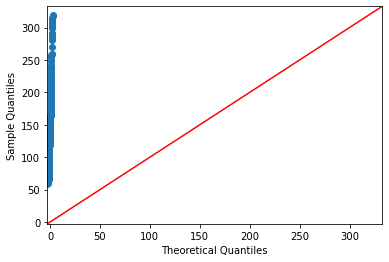

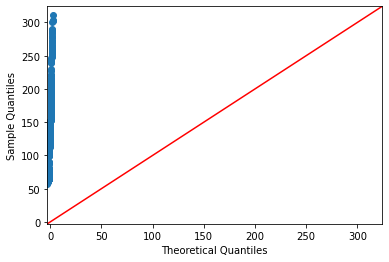

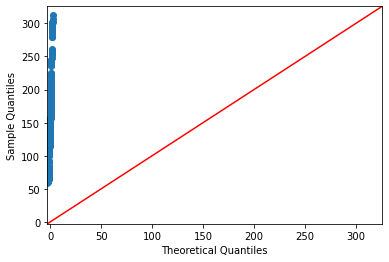

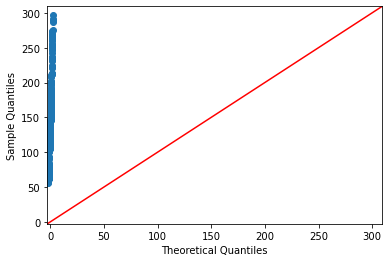

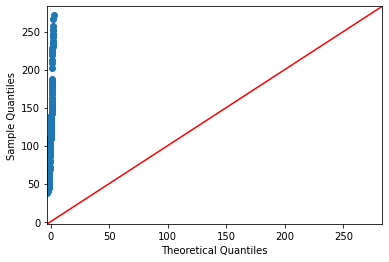

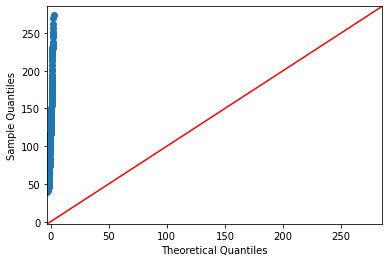

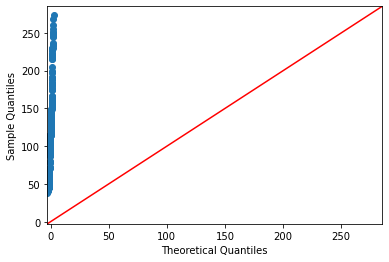

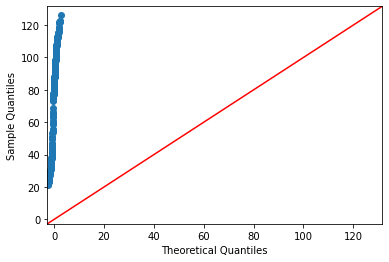

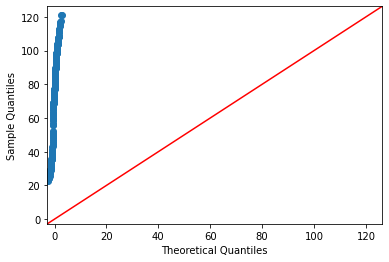

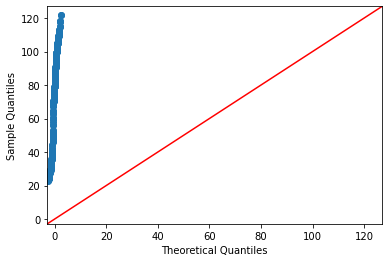

In [10]:
lista = X.columns.tolist() # converst the names of the columns of the model into a list

# loops that makes a plot with each column using the function created above
for i in lista:
    plot_QQ(X,i)

### Normalizing the Data Frame

To normalize the data, I am going to create two  dataframes, one without the ['Date'] column, and another one just with the ['Date'] column, once is normalized with MinMaxScaler(), and converte to a dataframe will be appended to the first dataframe that contains only the column ['Data'] 

As there is not Normality, and the outliers are real values and not errors, then I will proceed to Normalize the data, first with MinMax normalizer and then with Standar Normalizer

In [17]:
# creates X and y, with All the columns for X and for y = OIC_price
X = test.iloc[:, [1,2,3,5,7,8,9,10,11,12]].values # All the variables but OIC_price
y = test.iloc[:, 0].values # OIC_price

In [18]:
# Function that applies standarization with the Standar deviation method 
from sklearn.preprocessing import StandardScaler

# normalizing with standar deviation
X_scaler = StandardScaler()
y_scaler = StandardScaler()
    
# fits and transforms the data
X = X_scaler.fit_transform(X)
y = y.reshape(-1,1) # reshape because the array has to be a 2D array or (1 column, many rows..)
y = y_scaler.fit_transform(y)    

In [20]:
lista

['Colombia_ny',
 'Colombia_europe',
 'Colombia_average',
 'Other_europe',
 'Brazil_ny',
 'Brazil_europe',
 'Brazil_average',
 'Robustas_ny',
 'Robustas_europe',
 'Robustas_average']

In [23]:
# converting the numpy array back into dataframe
X = pd.DataFrame(X, columns = ['Colombia_ny', 'Colombia_europe', 'Colombia_average', 'Other_europe',
                               'Brazil_ny', 'Brazil_europe', 'Brazil_average', 'Robustas_ny', 'Robustas_europe',
                               'Robustas_average'])
X.head(5)

,Colombia_ny,Colombia_europe,Colombia_average,Other_europe,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
0,-0.372478,-0.403363,-0.345537,-0.470818,-0.416894,-0.397612,-0.477082,-0.917408,-0.831361,-0.830779
1,-0.459123,-0.498797,-0.433998,-0.589605,-0.540985,-0.525264,-0.598322,-1.065669,-0.998792,-0.992843
2,-0.542720,-0.547269,-0.519510,-0.626513,-0.572813,-0.560505,-0.629368,-1.141385,-1.120971,-1.090156
3,-0.652471,-0.658971,-0.631560,-0.745121,-0.642715,-0.640385,-0.697553,-1.213578,-1.174519,-1.157526
4,-0.690338,-0.680272,-0.670221,-0.754438,-0.627203,-0.634316,-0.682423,-1.214283,-1.185832,-1.162392


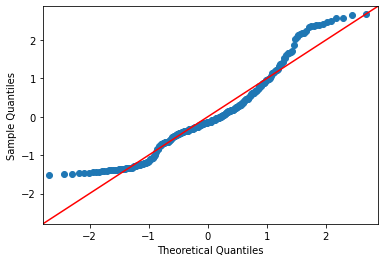

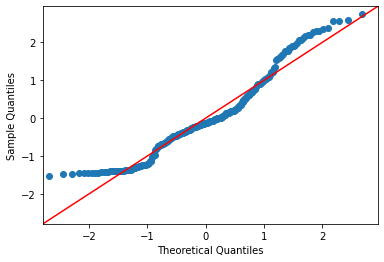

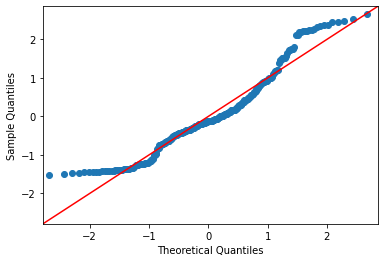

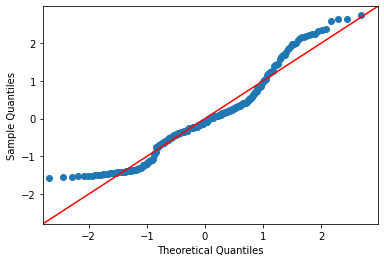

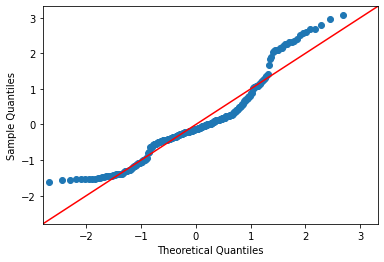

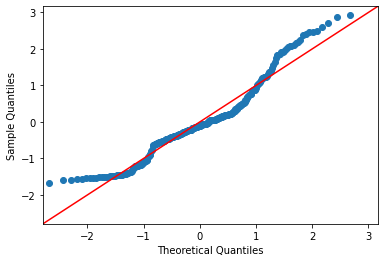

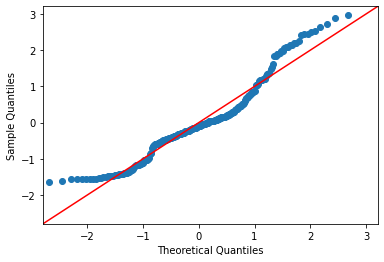

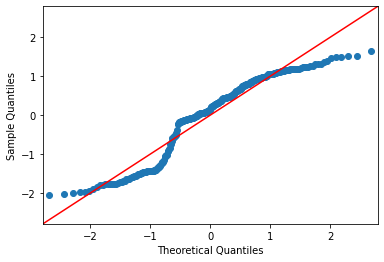

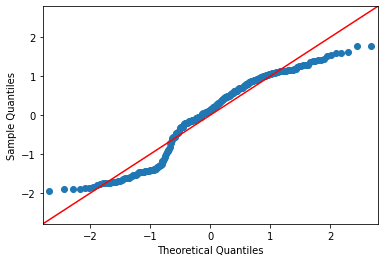

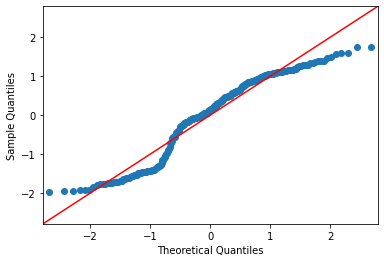

In [24]:
# checkin if there is Normality

# loops that makes a plot with each column using the function created above
for i in lista:
    plot_QQ(X,i)

Can now be seen that there is normality as the scatter data tries to follow the 45 degree line 

# End